In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [2]:
import os
import pandas as pd
import json

# Retrieve data
___
Sourced from Golden Cheetah Open Data Project

In [3]:
root_dir = 'E:\gc_opendata'
for a,b,c in os.walk(root_dir):
    athletes = b
    athletes.remove('INDEX')
    break

In [4]:
target_athlete = athletes[0]
for a, b, c in os.walk(f'{root_dir}\{target_athlete}'):
    activities = c
    break

In [6]:
target_activity = activities[-1]
with open(f'{root_dir}\{target_athlete}\{target_activity}', 'r') as f:
    ath_overview = f.read()

In [28]:
slip = json.loads(ath_overview)

In [30]:
slip = pd.DataFrame(pd.json_normalize(slip['RIDES']))

In [31]:
slip

,date,data,sport,METRICS.a_skiba_xpower,METRICS.a_skiba_relative_intensity,METRICS.a_skiba_bike_score,METRICS.a_skiba_variability_index,METRICS.a_skiba_response_index,METRICS.a_coggan_np,METRICS.a_coggan_if,...,METRICS.VDOT,METRICS.TPace,METRICS.60m_critical_pace,METRICS.90m_critical_pace,METRICS.1m_critical_pace_hr,METRICS.5m_critical_pace_hr,METRICS.10m_critical_pace_hr,METRICS.20m_critical_pace_hr,METRICS.30m_critical_pace_hr,METRICS.60m_critical_pace_hr
0,2017/01/31 17:36:44 UTC,T--PHC-A---E---,Bike,"[201.72655, 3948.00000]","[0.63040, 3948.00000]",43.58136,1.02521,1.12878,"[202.69124, 3948.00000]","[0.63341, 3948.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017/02/01 13:48:14 UTC,TDSPHC-AGL-E---,Bike,"[236.41023, 12131.00000]","[0.73878, 12131.00000]",183.91903,1.22188,1.40715,"[247.74282, 11190.00000]","[0.77420, 11190.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/02/04 12:45:56 UTC,TDSP-C-AGL-E---,Bike,"[287.50722, 2192.00000]","[0.89846, 2192.00000]",49.15137,1.16995,NaN,"[302.71458, 1986.00000]","[0.94598, 1986.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/02/06 14:31:55 UTC,TDSP-C-AGL-E---,Bike,"[241.43856, 6999.00000]","[0.75450, 6999.00000]",110.67431,1.17550,NaN,"[249.16094, 6802.00000]","[0.77863, 6802.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/02/07 14:03:11 UTC,TDSP-C-AGL-E---,Bike,"[254.25255, 8698.00000]","[0.79454, 8698.00000]",152.52730,1.18393,NaN,"[266.75610, 8142.00000]","[0.83361, 8142.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2018/11/06 14:38:08 UTC,TDS-H--AGL-----,Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,2018/11/08 15:05:43 UTC,TDSPHC-AGL-----,Bike,"[221.58505, 6295.00000]","[0.60542, 6295.00000]",64.09320,1.04682,1.60480,"[228.61994, 6058.00000]","[0.62464, 6058.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,2018/11/09 08:49:42 UTC,TDSPHC-AGL-----,Bike,"[272.02424, 6083.00000]","[0.74324, 6083.00000]",93.34012,1.10488,1.87541,"[288.48450, 5897.00000]","[0.78821, 5897.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,2018/11/10 08:32:21 UTC,TDSPHC-AGL-----,Bike,"[274.30729, 10283.00000]","[0.74947, 10283.00000]",160.44636,1.15262,1.95779,"[282.46161, 9889.00000]","[0.77175, 9889.00000]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
activ_sum = pd.read_csv("C:/Users/ryand/git/TriHealth/activities.csv",parse_dates=['date'])

In [15]:
activ_sum[['id','file']].groupby('id').count().sort_values('file').tail(30)

,file
id,
5953b117-12ac-47c2-915d-a90f3d1fd0fa,2288
8281a079-f0e2-47ca-b4b0-87af8ba73b6b,2323
1746288d-df53-4c13-a06a-978c7ae69318,2331
5e8b9087-baad-4dfa-ba28-dc40331ee254,2357
03fc0b0f-2611-4e20-97d9-c7a79b10550f,2366
9524c2b5-98af-4b15-b3d5-cb9ffe95a4b9,2407
7a1d6342-15e2-41c4-832f-fb2699cd6e0c,2422
38ec277a-e5a4-483c-9d59-6af0ff6bccab,2434
72bb0b9a-d866-4bca-a69b-89a93484d305,2465


# Sample Explore

In [17]:
target_id = "7567ac31-d479-4b25-9538-541ae8085288"

In [39]:
act_samp = activ_sum[activ_sum['id'] == target_id].copy()

In [46]:
act_samp.columns.tolist()

['id',
 'file',
 'date',
 'age',
 'gender',
 'sport',
 'data',
 '1s_critical_power',
 '15s_critical_power',
 '2m_critical_power',
 '3m_critical_power',
 '5m_critical_power',
 '8m_critical_power',
 '10m_critical_power',
 '20m_critical_power',
 '30m_critical_power',
 '1m_peak_wpk',
 '5m_peak_wpk',
 '10m_peak_wpk',
 '20m_peak_wpk',
 '30m_peak_wpk',
 'workout_time',
 'total_distance',
 'elevation_gain',
 'total_work',
 'average_speed',
 'average_power',
 'average_hr',
 'average_cad',
 'coggan_np',
 'coggam_variability_index',
 'coggan_if',
 'coggan_tss',
 'Unnamed: 33',
 'athlete_weight']

In [42]:
act_samp['athlete_weight'] = act_samp['20m_critical_power']/act_samp['20m_peak_wpk']
act_samp['athlete_weight'] = act_samp['athlete_weight'].ffill().bfill()

In [50]:
act_samp.set_index('date',inplace=True)

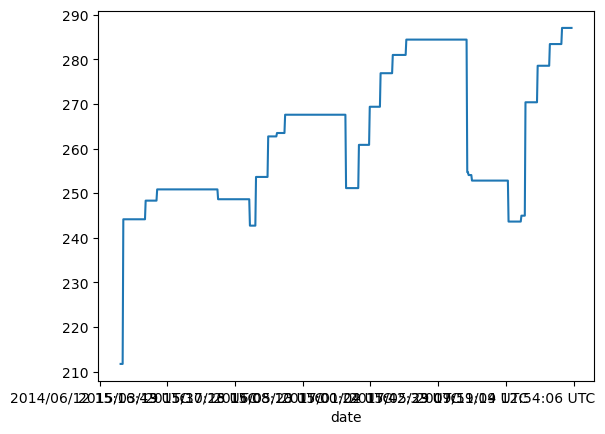

In [79]:
act_samp[act_samp['sport'] == 'Bike']['20m_critical_power'].rolling(window=90, min_periods=1).max().plot();

<AxesSubplot:xlabel='workout_time', ylabel='average_hr'>

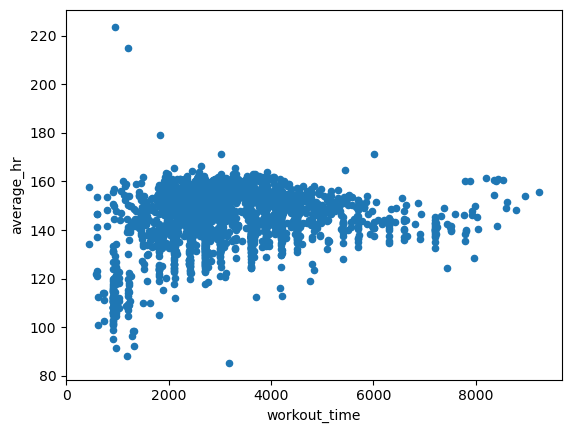

In [57]:
act_samp.plot(kind='scatter',x='workout_time',y='average_hr')

In [61]:
def calc_vo2(row, max_hr, resting_hr):
    if row['sport'] == 'Bike':
        percent_vo2 = (row['average_hr'] - resting_hr)/(max_hr - resting_hr)
        vo2_estimated = (((row['average_power']/75)*1000)/row['athlete_weight']) / percent_vo2
        # vo2_estimated = row['VO2max_Detected'] ## overide with Garmin VO2 Estimation
    elif row['sport'] == 'Run':
        percent_vo2 = (row['average_hr'] - resting_hr)/(max_hr - resting_hr)
        vo2_estimated = (210/row['average_speed']) / percent_vo2
    else:
        vo2_estimated =  0
    return vo2_estimated

In [62]:
act_samp['VO2'] = act_samp.apply(lambda row: calc_vo2(row, 179, 45), axis=1)

In [63]:
act_samp

,id,file,age,gender,sport,data,1s_critical_power,15s_critical_power,2m_critical_power,3m_critical_power,...,average_power,average_hr,average_cad,coggan_np,coggam_variability_index,coggan_if,coggan_tss,Unnamed: 33,athlete_weight,VO2
date,,,,,,,,,,,,,,,,,,,,,
2008/01/06 01:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,NaN,44,M,Run,---------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000042,NaN
2008/01/13 01:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,NaN,44,M,Run,---------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000042,NaN
2008/01/20 01:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,NaN,44,M,Run,---------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000042,NaN
2008/01/27 01:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,NaN,44,M,Run,---------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000042,NaN
2008/02/03 01:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,NaN,44,M,Run,---------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000042,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018/04/13 15:00:00 UTC,7567ac31-d479-4b25-9538-541ae8085288,2018_04_13_12_00_00.csv,44,M,Strength,T--------------,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000003,0.000000
2018/04/14 08:35:36 UTC,7567ac31-d479-4b25-9538-541ae8085288,2018_04_14_10_35_36.csv,44,M,Bike,TDSPHC-A-L-EV--,452.0,408.86667,289.55833,288.20556,...,230.44676,134.91195,76.47596,243.34547,1.05597,0.89795,127.68988,NaN,72.000012,63.601031
2018/04/14 12:42:12 UTC,7567ac31-d479-4b25-9538-541ae8085288,2018_04_14_14_42_12.csv,44,M,Run,TDSPHC--------R,323.0,318.20000,287.53333,277.98889,...,259.42193,137.11462,NaN,265.31955,1.02273,0.85587,NaN,NaN,72.000012,24.627091


# Modeling

In [64]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 2)
        self.fc3 = nn.Linear(2, 1)
         
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)
    
net = NN()
print(net)

NN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
)
